# Analyse des données d'expérience

Expérience: J7 Energie Solaire, expérience 1

Date: 2023-10-01

In [23]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
import tikzplotlib as tikz

In [25]:
rawdata = np.loadtxt("../data/Pgamma(d).csv", dtype=float, delimiter=",", skiprows=1, max_rows=26)
d2inverse = 1/(rawdata[:,0]**2)
len(rawdata)

26

In [26]:
# Pgamma
PgammaS = rawdata[:,1]
Pgamma = PgammaS * 0.01

In [41]:
delta_PgammaS = np.ones(len(PgammaS))
delta_PgammaS

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
S = 0.01
delta_S = 0.0004
delta_Pgamma = delta_S * PgammaS + S * delta_PgammaS
print("\n".join(f"{80 - 2*i}: {num}" for i, num in enumerate(delta_Pgamma)))
delta_Pgamma

80: 0.02908
78: 0.030240000000000003
76: 0.030600000000000002
74: 0.031760000000000004
72: 0.0328
70: 0.03388
68: 0.03484
66: 0.03612
64: 0.03712
62: 0.039
60: 0.04052
58: 0.04188000000000001
56: 0.04424
54: 0.045680000000000005
52: 0.04784
50: 0.049960000000000004
48: 0.05296000000000001
46: 0.05568000000000001
44: 0.05816
42: 0.062040000000000005
40: 0.06604
38: 0.0696
36: 0.0738
34: 0.07927999999999999
32: 0.08436
30: 0.09036


array([0.02908, 0.03024, 0.0306 , 0.03176, 0.0328 , 0.03388, 0.03484,
       0.03612, 0.03712, 0.039  , 0.04052, 0.04188, 0.04424, 0.04568,
       0.04784, 0.04996, 0.05296, 0.05568, 0.05816, 0.06204, 0.06604,
       0.0696 , 0.0738 , 0.07928, 0.08436, 0.09036])

In [46]:
coefs = np.polyfit(d2inverse[:21], Pgamma[:21], 1)
fit = np.poly1d(coefs)
coefs

array([2.21705587e+03, 1.70676301e-01])

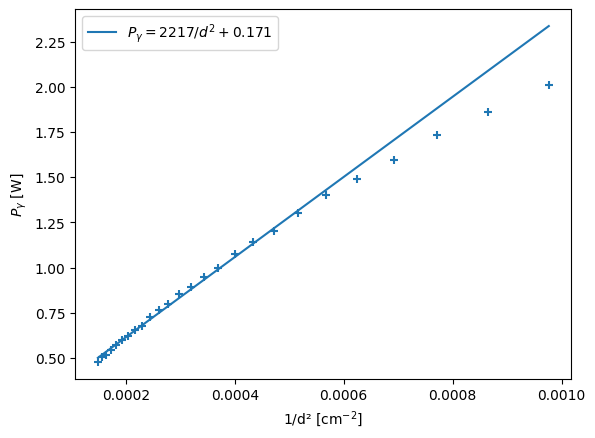

In [47]:
plt.scatter(d2inverse, Pgamma, marker="+")
plt.plot(d2inverse, fit(d2inverse), label=f"$P_\gamma = {coefs[0]:.0f}/d^2 + {coefs[1]:.3f}$")
plt.xlabel("1/d² [cm$^{-2}$]")
plt.ylabel("$P_\gamma$ [W]")
# plt.title(f"$P_\gamma$ = {round(coefs[0], -3)}/d² + {round(coefs[1])}")
#TODO: signifcant figures
# plt.suptitle("Fit linéaire de P$_\gamma$ en fonction de 1/d²")
plt.legend()
tikz.save("../plots/Pgamma(1d2).tikz")

In [48]:
print(f"On obtient un fit donnant P$_\gamma$ = {coefs[0]}/d² + {coefs[1]}")

On obtient un fit donnant P$_\gamma$ = 2217.055869818473/d² + 0.17067630148341562
